### Question 1

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Create a csv file with the given data

In [291]:
data = {
    'mother': [58,62,60,64,67,70],
    'daughter': [60,60,58,60,70,72]
}

df = pd.DataFrame(data)

csv_file = 'height.csv'
df.to_csv(csv_file, index=False)
df

,mother,daughter
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [292]:
X=df['mother'].values
Y=df['daughter'].values
errors = []

### Gradient descent for linear regression

In [293]:
def gradient_descent(X, Y, epochs, alpha, b1, b0):
    for _ in range(epochs):  
        for x, y in zip(X, Y):
            y_pred = b1 * x + b0
            error = y_pred - y
            b1 -= alpha * error * x
            b0 -= alpha * error
            errors.append(abs(y_pred-y))
        
    
    return b1, b0

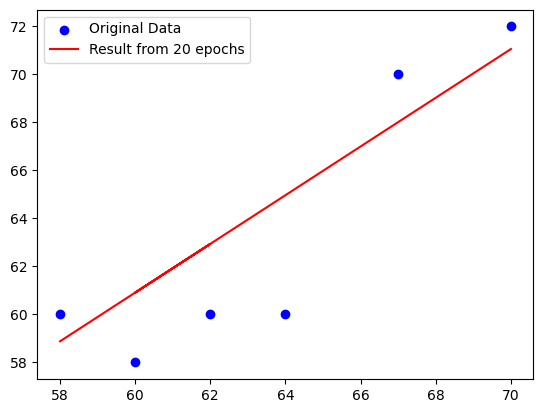

In [294]:
b1,b0 = gradient_descent(X,Y,4,0.0001,0,0)
y_pred=[b1*x + b0 for x in X]

plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label=f'Result from 20 epochs')
plt.legend()

### Gradient Error Decrease

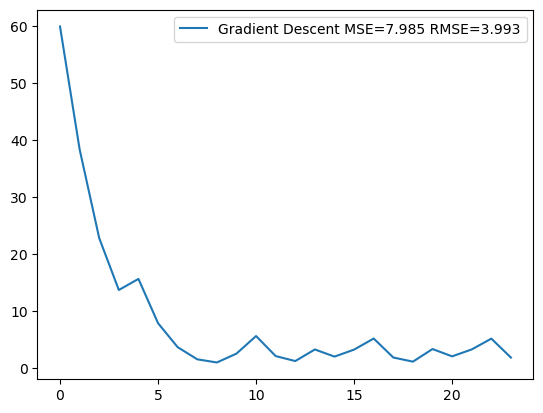

In [299]:
SE = 0
for y, pred in zip(Y, y_pred):
    SE += (pred-y)**2
MSE =SE/len(Y)
RMSE = MSE ** 1/2
    
plt.plot(list(range(len(errors))), errors,linestyle='-',label=f'Gradient Descent MSE={MSE:.3f} RMSE={RMSE:.3f}')
plt.legend()

### Making Predictions

In [300]:
print(f"Daughter's height when moms height is 63 : {b1*63 +b0}")

Daughter's height when moms height is 63 : 63.956400249074235


### Predictions using sckit-learn

### Question 2

### Create a csv file with the given data

In [301]:
data = {
    'hours': [1,2,3,4,5,6,7,8],
    'pass': [0,0,0,0,1,1,1,1]
}

df = pd.DataFrame(data)

csv_file = 'passed.csv'
df.to_csv(csv_file, index=False)
df

,hours,pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [302]:
X=df['hours'].values
Y=df['pass'].values
losses = []

### Defining Log Loss Function

In [303]:
def calc_loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

### Logistic Regression

In [304]:
def logistic_regression(X,Y,epochs,alpha,b1,b0):
    for _ in range(epochs):
        for x,y in zip(X,Y):
            z=b1*x + b0
            y_pred=1/(1+np.exp(-z))
            error=y_pred-y
            b1-=(alpha*error*x)
            b0-=(alpha*error)
        losses.append(calc_loss(y_pred,y))
    
    return b1,b0

### Fitted Values

In [305]:
b1,b0 = logistic_regression(X,Y,500,0.01,0,0)
y_probs=[1/(1+np.exp(-(b1*x+b0))) for x in X]
y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

print(y_binary)

[0, 0, 0, 0, 1, 1, 1, 1]


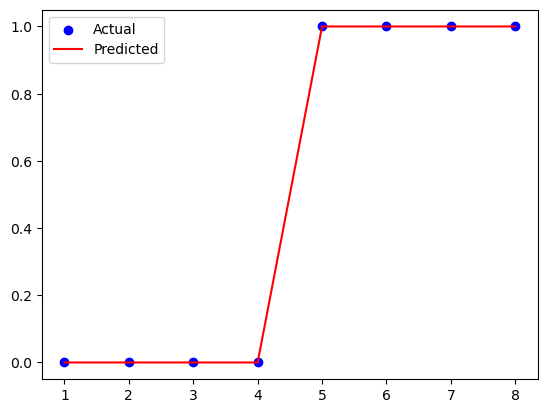

In [306]:
plt.scatter(X,Y,color='blue',label='Actual')
plt.plot(X,y_binary,color='red',label='Predicted')
plt.legend()
plt.show()

### Making Predictions

In [307]:
print(f"Probability of passing when studying for 3.5hrs : {1/(1+np.exp(-(w*3.5 +b)))}")
print(f"Probability of passing when studying for 7.5hrs : {1/(1+np.exp(-(w*7.5 +b)))}")

Probability of passing when studying for 3.5hrs : 0.9725786259774007
Probability of passing when studying for 7.5hrs : 0.9995137543752545


### Decrease of Log Loss

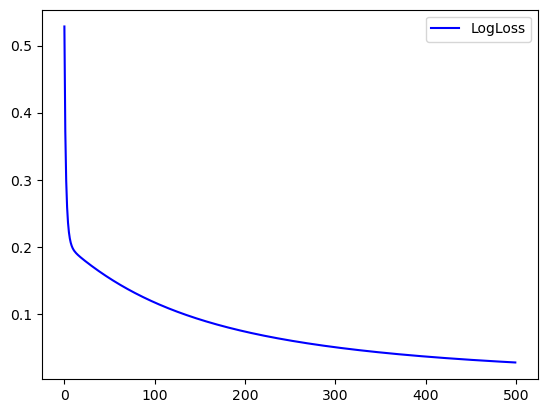

In [308]:
plt.plot(list(range(len(losses))),losses,color='blue',label='LogLoss')
plt.legend()

### Question 3

### Create a csv file with the given data

In [311]:
data = {
    'x1': [4,2,1,3,1,6],
    'x2': [1,8,0,2,4,7],
    'y': [0,1,0,1,1,1]
    
}

df = pd.DataFrame(data)

csv_file = 'values.csv'
df.to_csv(csv_file, index=False)
df

,x1,x2,y
0,4,1,0
1,2,8,1
2,1,0,0
3,3,2,1
4,1,4,1
5,6,7,1


In [312]:
X1=df['x1'].values
X2=df['x2'].values
Y=df['y'].values
losses=[]

### Defining Log Loss Function

In [313]:
def calc_loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

### Multiple Variable Logistic Regression

In [314]:
def multi_logistic_regression(X1,X2,Y,epochs,alpha,b1,b2,b0):
    for _ in range(epochs):
        for x1,x2,y in zip(X1,X2,Y):
            z=b1*x1 + b2*x2 + b0
            y_pred=1/(1+np.exp(-z))
            error=y_pred-y
            b1 -=(alpha*error*x1)
            b2 -=(alpha*error*x2)
            b0 -=(alpha*error)
        losses.append(calc_loss(y_pred,y))
    
    return b1,b2,b0

### Fitted Values

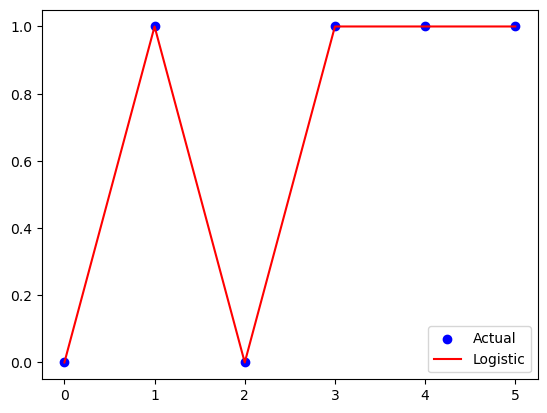

In [315]:
b1,b2,b0=multi_logistic_regression(X1,X2,Y,100,0.01,0,0,0)
y_probs=[]
for x1,x2,y in zip(X1,X2,Y):
    z=b1*x1 + b2*x2 + b0
    y_pred=1/(1+np.exp(-z))
    y_probs.append(y_pred)

y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

plt.scatter(list(range(len(Y))),Y,color='blue',label='Actual')
plt.plot(list(range(len(y_binary))),y_binary,color='red',label='Logistic')
plt.legend()
plt.show()

### Log Loss

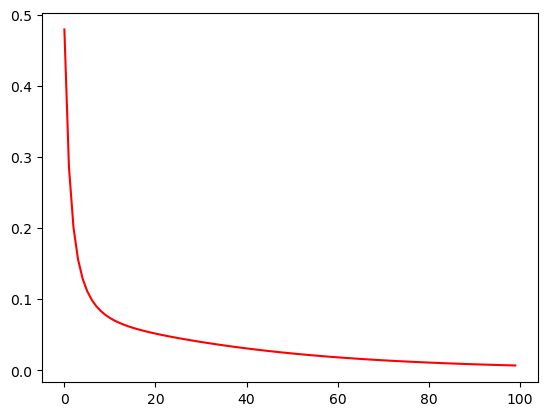

In [316]:
plt.plot(list(range(len(losses))),losses,color='red',label='LogLoss')